In [1]:

import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras
import sys, time, os, warnings 
import numpy as np
import pandas as pd 
from collections import Counter
warnings.filterwarnings("ignore")
print("python {}".format(sys.version))
print("keras version {}".format(keras.__version__)); del keras
print("tensorflow version {}".format(tf.__version__))

def set_seed(sd=123):
    from numpy.random import seed
    from tensorflow import set_random_seed
    import random as rn
    ## numpy random seed
    seed(sd)
    ## core python's random number
    rn.seed(sd)
    ## tensor flow's random number
    set_random_seed(sd)

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


python 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
keras version 2.2.4
tensorflow version 1.12.0


In [2]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.95
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

In [3]:
import platform

print(platform.python_version())


3.6.5


In [4]:
## The location of the Flickr8K_ photos
dir_Flickr_jpg = r"D:\majordataset\Flicker8k_Dataset"
## The location of the caption file
dir_Flickr_text = r"D:\majordataset\Flickr8k.token.txt"

jpgs = os.listdir(dir_Flickr_jpg)
print("The number of jpg flies in Flicker8k: {}".format(len(jpgs)))

The number of jpg flies in Flicker8k: 8096


In [5]:
file = open(dir_Flickr_text,'r')
text = file.read()
file.close()


datatxt = []
for line in text.split('\n'):
    col = line.split('\t')
    if len(col) == 1:
        continue
    w = col[0].split("#")
    datatxt.append(w + [col[1].lower()])

df_txt = pd.DataFrame(datatxt,columns=["filename","index","caption"])


uni_filenames = np.unique(df_txt.filename.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df_txt.filename.values).values())

The number of unique file names : 8092
The distribution of the number of captions for each image:


Counter({5: 8092})

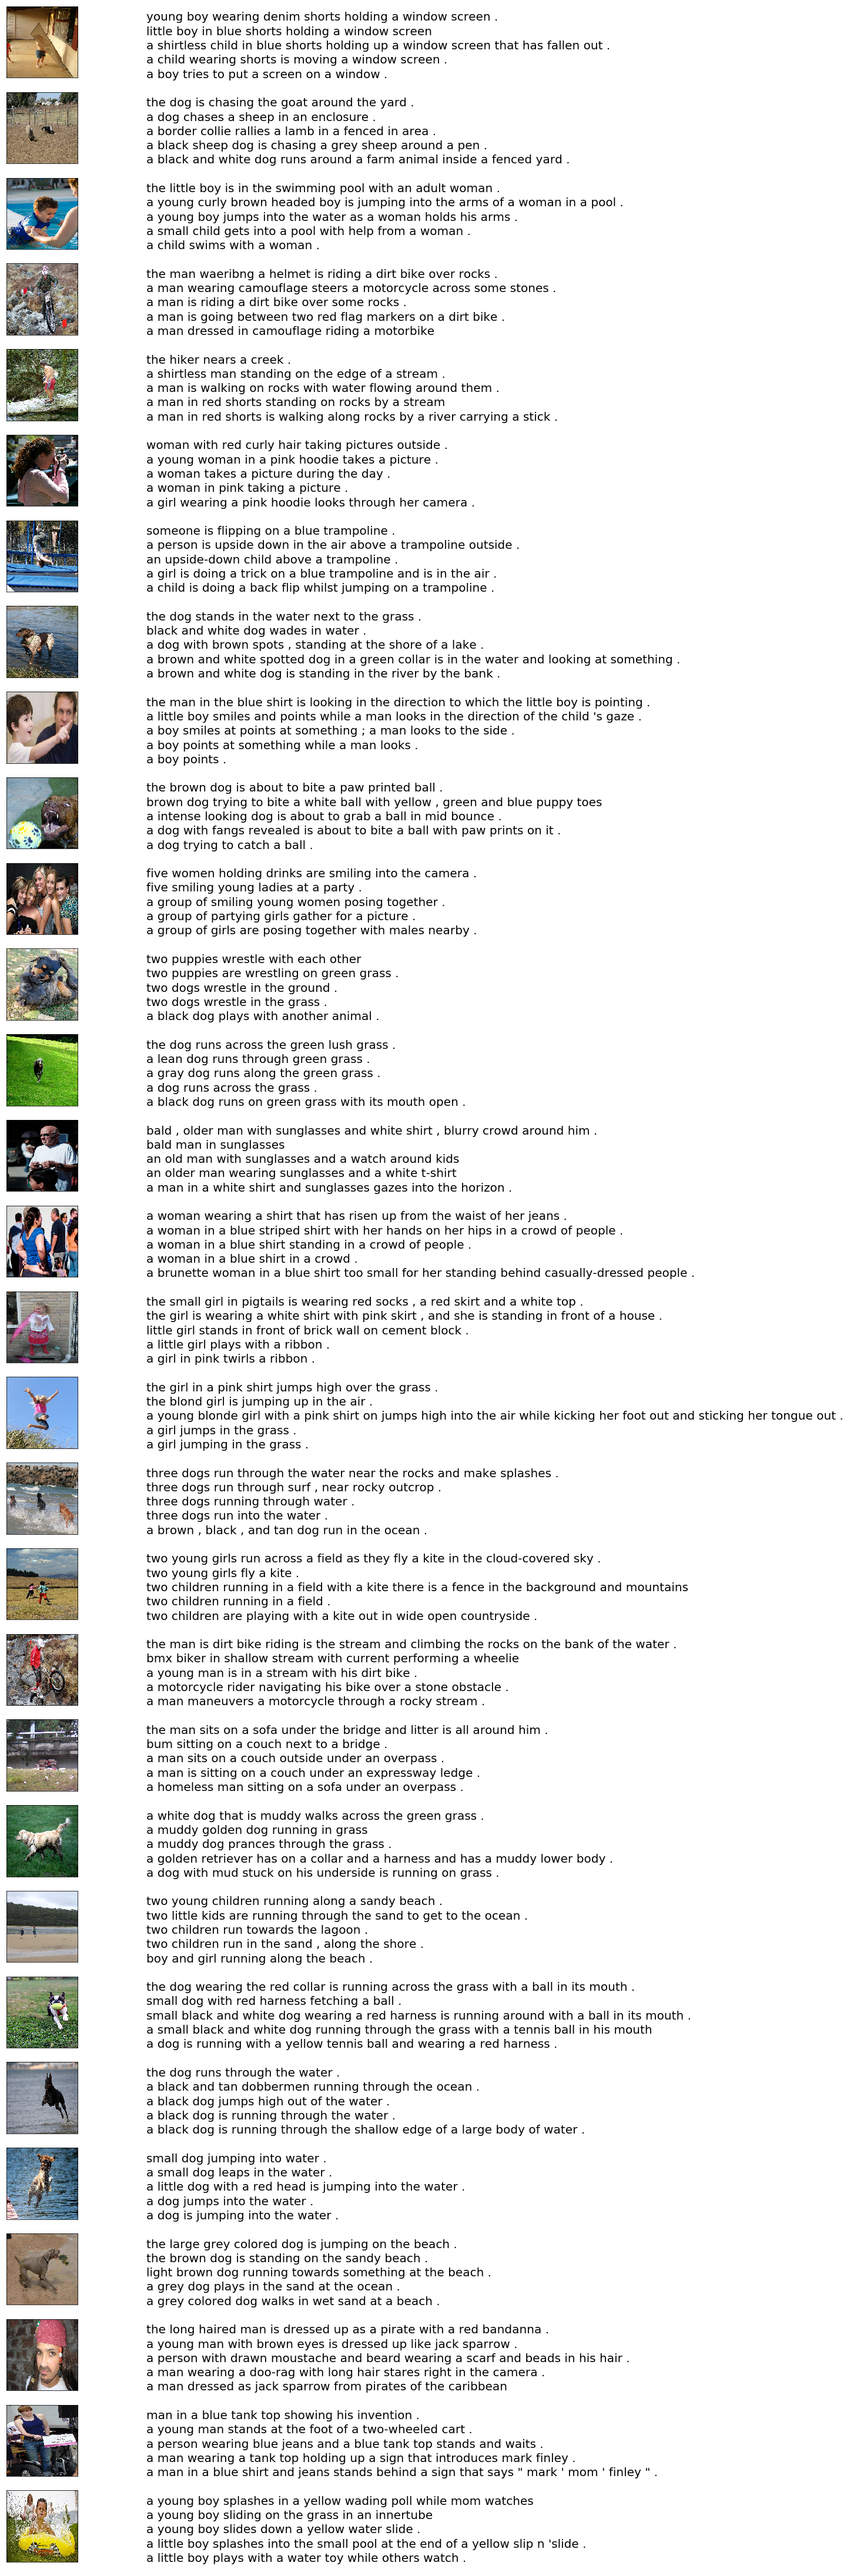

In [6]:
from keras.preprocessing.image import load_img, img_to_array

npic = 30
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,80))
for jpgfnm in uni_filenames[550:580]:
    filename = dir_Flickr_jpg + '/' + jpgfnm
    captions = list(df_txt["caption"].loc[df_txt["filename"]==jpgfnm].values)
    image_load = load_img(filename, target_size=target_size)
    
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1
    
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count += 1
plt.show()


In [7]:
df_txt


filename index  \
0      1000268201_693b08cb0e.jpg     0   
1      1000268201_693b08cb0e.jpg     1   
2      1000268201_693b08cb0e.jpg     2   
3      1000268201_693b08cb0e.jpg     3   
4      1000268201_693b08cb0e.jpg     4   
5      1001773457_577c3a7d70.jpg     0   
6      1001773457_577c3a7d70.jpg     1   
7      1001773457_577c3a7d70.jpg     2   
8      1001773457_577c3a7d70.jpg     3   
9      1001773457_577c3a7d70.jpg     4   
10     1002674143_1b742ab4b8.jpg     0   
11     1002674143_1b742ab4b8.jpg     1   
12     1002674143_1b742ab4b8.jpg     2   
13     1002674143_1b742ab4b8.jpg     3   
14     1002674143_1b742ab4b8.jpg     4   
15     1003163366_44323f5815.jpg     0   
16     1003163366_44323f5815.jpg     1   
17     1003163366_44323f5815.jpg     2   
18     1003163366_44323f5815.jpg     3   
19     1003163366_44323f5815.jpg     4   
20     1007129816_e794419615.jpg     0   
21     1007129816_e794419615.jpg     1   
22     1007129816_e794419615.jpg     2   
23     1007129816_e794419615.jpg     3   
24     1007129816_e794419615.jpg     4   
25     1007320043_627395c3d8.jpg     0   
26     1007320043_627395c3d8.jpg     1   
27     1007320043_627395c3d8.jpg     2   
28     1007320043_627395c3d8.jpg     3   
29     1007320043_627395c3d8.jpg     4   
...                          ...   ...   
40430   989851184_9ef368e520.jpg     0   
40431   989851184_9ef368e520.jpg     1   
40432   989851184_9ef368e520.jpg     2   
40433   989851184_9ef368e520.jpg     3   
40434   989851184_9ef368e520.jpg     4   
40435   990890291_afc72be141.jpg     0   
40436   990890291_afc72be141.jpg     1   
40437   990890291_afc72be141.jpg     2   
40438   990890291_afc72be141.jpg     3   
40439   990890291_afc72be141.jpg     4   
40440    99171998_7cc800ceef.jpg     0   
40441    99171998_7cc800ceef.jpg     1   
40442    99171998_7cc800ceef.jpg     2   
40443    99171998_7cc800ceef.jpg     3   
40444    99171998_7cc800ceef.jpg     4   
40445    99679241_adc853a5c0.jpg     0   
40446    99679241_adc853a5c0.jpg     1   
40447    99679241_adc853a5c0.jpg     2   
40448    99679241_adc853a5c0.jpg     3   
40449    99679241_adc853a5c0.jpg     4   
40450   997338199_7343367d7f.jpg     0   
40451   997338199_7343367d7f.jpg     1   
40452   997338199_7343367d7f.jpg     2   
40453   997338199_7343367d7f.jpg     3   
40454   997338199_7343367d7f.jpg     4   
40455   997722733_0cb5439472.jpg     0   
40456   997722733_0cb5439472.jpg     1   
40457   997722733_0cb5439472.jpg     2   
40458   997722733_0cb5439472.jpg     3   
40459   997722733_0cb5439472.jpg     4   

                                                 caption  
0      a child in a pink dress is climbing up a set o...  
1                  a girl going into a wooden building .  
2       a little girl climbing into a wooden playhouse .  
3      a little girl climbing the stairs to her playh...  
4      a little girl in a pink dress going into a woo...  
5             a black dog and a spotted dog are fighting  
6      a black dog and a tri-colored dog playing with...  
7      a black dog and a white dog with brown spots a...  
8      two dogs of different breeds looking at each o...  
9        two dogs on pavement moving toward each other .  
10     a little girl covered in paint sits in front o...  
11     a little girl is sitting in front of a large p...  
12     a small girl in the grass plays with fingerpai...  
13     there is a girl with pigtails sitting in front...  
14     young girl with pigtails painting outside in t...  
15     a man lays on a bench while his dog sits by him .  
16     a man lays on the bench to which a white dog i...  
17     a man sleeping on a bench outside with a white...  
18     a shirtless man lies on a park bench with his ...  
19     man laying on bench holding leash of dog sitti...  
20        a man in an orange hat starring at something .  
21               a man wears an orange hat and glasses .  
22     a man with gauges and glasses is wearing a bli...  
23 

In [8]:
df_txt['filename'][10]

'1002674143_1b742ab4b8.jpg'

In [9]:
def df_word(df_txt):
    vocabulary = []
    for txt in df_txt.caption.values:
        vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame.from_dict(ct, orient='index').reset_index()
    dfword = dfword.rename(columns={'index':'word', 0:'count'})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt)
dfword.head(3)

Vocabulary Size: 8918


word  count
0    a  62989
1    .  36581
2   in  18975

In [10]:
import string


def remove_punctuation(text_original):
    #text_no_punctuation = text_original.translate(None, string.punctuation)
    text_no_punctuation = text_original.translate(str.maketrans('','',string.punctuation))
    return(text_no_punctuation)


def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)



def remove_numeric(text,printTF=False):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if printTF:
            print("    {:10} : {:}".format(word,isalpha))
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)



In [11]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)


for i, caption in enumerate(df_txt.caption.values):
    newcaption = text_clean(caption)
    df_txt["caption"].iloc[i] = newcaption

In [12]:
from copy import copy
def add_start_end_seq_token(captions):
    caps = []
    for txt in captions:
        txt = 'startseq ' + txt + ' endseq'
        caps.append(txt)
    return(caps)
df_txt0 = copy(df_txt)
df_txt0["caption"] = add_start_end_seq_token(df_txt["caption"])
df_txt0.head(5)

filename index  \
0  1000268201_693b08cb0e.jpg     0   
1  1000268201_693b08cb0e.jpg     1   
2  1000268201_693b08cb0e.jpg     2   
3  1000268201_693b08cb0e.jpg     3   
4  1000268201_693b08cb0e.jpg     4   

                                             caption  
0  startseq  child in pink dress is climbing up s...  
1   startseq  girl going into wooden building endseq  
2  startseq  little girl climbing into wooden pla...  
3  startseq  little girl climbing the stairs to h...  
4  startseq  little girl in pink dress going into...

In [13]:
from keras.applications import VGG16
#from keras.applications.inception_v3 import InceptionV3
modelvgg = VGG16(include_top=True,weights=None)
#modelinception=InceptionV3(include_top=False,weights='imagenet')
## load the locally saved weights 
modelvgg.load_weights(r"D:\majordataset\vgg16.h5")
#modelinception.load_weights(r"D:\majordataset\inceptionv3.h5")
#modelinception.summary()
modelvgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [14]:
from keras import models
modelvgg.layers.pop()
#modelinception.layers.pop()
modelvgg = models.Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-1].output)
#modelinception = models.Model(inputs=modelinception.inputs, outputs=modelinception.layers[-1].output)
## show the deep learning model
modelvgg.summary()
#modelinception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
print(len(jpgs))

8096


In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

with tf.Session() as sess:
    print(sess.run(tf.report_uninitialized_variables()))

[b'block1_conv1/kernel' b'block1_conv1/bias' b'block1_conv2/kernel'
 b'block1_conv2/bias' b'block2_conv1/kernel' b'block2_conv1/bias'
 b'block2_conv2/kernel' b'block2_conv2/bias' b'block3_conv1/kernel'
 b'block3_conv1/bias' b'block3_conv2/kernel' b'block3_conv2/bias'
 b'block3_conv3/kernel' b'block3_conv3/bias' b'block4_conv1/kernel'
 b'block4_conv1/bias' b'block4_conv2/kernel' b'block4_conv2/bias'
 b'block4_conv3/kernel' b'block4_conv3/bias' b'block5_conv1/kernel'
 b'block5_conv1/bias' b'block5_conv2/kernel' b'block5_conv2/bias'
 b'block5_conv3/kernel' b'block5_conv3/bias' b'fc1/kernel' b'fc1/bias'
 b'fc2/kernel' b'fc2/bias' b'predictions/kernel' b'predictions/bias']


In [17]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
import pickle

images = OrderedDict()
npix = 224
target_size = (npix,npix,3)

In [18]:
# #don't run it next time it is saved and loaded in next command
# # Preprocess and save the ordered dictionary to pickle
# from keras.applications.vgg16 import preprocess_input
# data = np.zeros((1000,npix,npix,3))
# for i,name in enumerate(jpgs):
#     # load an image from file
#     filename = dir_Flickr_jpg + '/' + name
#     image = load_img(filename, target_size=target_size)
#     # convert the image pixels to a numpy array
#     image = img_to_array(image)
#     nimage = preprocess_input(image)
#     y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
#    # y_pred = modelinception.predict(nimage.reshape( (1,) + nimage.shape[:3]))
#     images[name] = y_pred.flatten()
        
# with open("dictest.txt", "wb") as myFile:
#     pickle.dump(images, myFile)
#     print("Saved dictionary as dicinc.txt!")

In [24]:
from keras import backend
backend.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [25]:
# Load the saved dictionary from pickle
with open("dicvggg.txt", "rb") as myFile:
    images = pickle.load(myFile)

In [26]:
print(images['1000268201_693b08cb0e.jpg'])

[2.5076475 0.        0.        ... 0.        0.        0.       ]


In [27]:
dimages, keepindex = [],[]
df_txt0 = df_txt0.loc[df_txt0["index"].values == "0",: ]
for i, fnm in enumerate(df_txt0.filename):
    if fnm in images.keys():
        dimages.append(images[fnm])
        keepindex.append(i)
        
fnames = df_txt0["filename"].iloc[keepindex].values
dcaptions = df_txt0["caption"].iloc[keepindex].values
dimages = np.array(dimages)

In [28]:
from keras.preprocessing.text import Tokenizer
## the maximum number of words in dictionary
nb_words = 8000
tokenizer = Tokenizer(nb_words=nb_words)
tokenizer.fit_on_texts(dcaptions)
vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size : {}".format(vocab_size))
dtexts = tokenizer.texts_to_sequences(dcaptions)
print(dtexts[:5])

vocabulary size : 4476
[[1, 38, 3, 66, 144, 7, 124, 52, 406, 9, 367, 3, 24, 2351, 522, 2], [1, 12, 8, 5, 752, 8, 17, 368, 2], [1, 48, 15, 170, 3, 584, 101, 3, 41, 9, 551, 1198, 11, 55, 213, 3, 1076, 2], [1, 10, 621, 6, 150, 27, 23, 8, 101, 46, 112, 2], [1, 10, 3, 24, 82, 96, 1199, 19, 162, 2]]


In [29]:
len(dtexts)

8091

In [30]:
prop_test, prop_val = 0.2, 0.2

N = len(dtexts)
Ntest, Nval = int(N*prop_test), int(N*prop_val)

def split_test_val_train(dtexts,Ntest,Nval):
    return(dtexts[:Ntest], 
           dtexts[Ntest:Ntest+Nval],  
           dtexts[Ntest+Nval:])

dt_test,  dt_val, dt_train   = split_test_val_train(dtexts,Ntest,Nval)
di_test,  di_val, di_train   = split_test_val_train(dimages,Ntest,Nval)
fnm_test,fnm_val, fnm_train  = split_test_val_train(fnames,Ntest,Nval)

In [31]:
maxlen = np.max([len(text) for text in dtexts])
maxlen

30

In [32]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def preprocessing(dtexts,dimages):
    N = len(dtexts)
    print("# captions/images = {}".format(N))

    assert(N==len(dimages))
    Xtext, Ximage, ytext = [],[],[]
    for text,image in zip(dtexts,dimages):

        for i in range(1,len(text)):
            in_text, out_text = text[:i], text[i]
            in_text = pad_sequences([in_text],maxlen=maxlen).flatten()
            out_text = to_categorical(out_text,num_classes = vocab_size)

            Xtext.append(in_text)
            Ximage.append(image)
            ytext.append(out_text)

    Xtext  = np.array(Xtext)
    Ximage = np.array(Ximage)
    ytext  = np.array(ytext)
    print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
    return(Xtext,Ximage,ytext)


Xtext_train, Ximage_train, ytext_train = preprocessing(dt_train,di_train)
Xtext_val,   Ximage_val,   ytext_val   = preprocessing(dt_val,di_val)

# captions/images = 4855
 (49631, 30) (49631, 4096) (49631, 4476)
# captions/images = 1618
 (16353, 30) (16353, 4096) (16353, 4476)


In [33]:
from keras import layers 
from keras import optimizers
from keras.layers import Dropout
import keras
print(vocab_size)
## image feature

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(1024,activation='relu',name="ImageFeature")(input_image)
## sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.GRU(1024,name="CaptionFeature1")(ftxt)
# reshaped = keras.layers.core.Reshape((-1 , 256))(ftxt)
#ftxt = layers.GRU(256,name="CaptionFeature2")(reshaped)
## combined model for decoder
decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(1024,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)
model = models.Model(inputs=[input_image, input_txt],outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

4476
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 64)       286464      input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
CaptionFeature1 (GRU)           (None, 1024)         3345408     embedding_1[0][0]                
__________________________________________________________________________________________________
Image

In [34]:
from keras.models import load_model
mm = load_model('4maytestmajor.h5')

In [33]:
from keras.callbacks import ModelCheckpoint
checkpoint = [ModelCheckpoint(os.getcwd() + "\checkpoint101010.txt", monitor='val_acc', verbose=1,save_best_only=True,mode='max')]

# fit model
start = time.time()
hist = model.fit([Ximage_train, Xtext_train], ytext_train, 
                  epochs=4, verbose=1, 
                  batch_size=64,shuffle=True,
                  validation_data=([Ximage_val, Xtext_val], ytext_val), 
                  callbacks=checkpoint)
model.save('modelmajortest1.h5')
end = time.time()
print("TIME TOOK {:3.2f}MIN".format((end - start )/60))

Train on 49631 samples, validate on 16353 samples
Epoch 1/4
49631/49631 [==============================] - 191s 4ms/step - loss: 5.1887 - acc: 0.1779 - val_loss: 4.5745 - val_acc: 0.2501

Epoch 00001: val_acc improved from -inf to 0.25011, saving model to C:\Users\NODDY\checkpoint101010.txt
Epoch 2/4
49631/49631 [==============================] - 173s 3ms/step - loss: 4.1828 - acc: 0.2615 - val_loss: 4.3597 - val_acc: 0.2749

Epoch 00002: val_acc improved from 0.25011 to 0.27493, saving model to C:\Users\NODDY\checkpoint101010.txt
Epoch 3/4
49631/49631 [==============================] - 161s 3ms/step - loss: 3.7260 - acc: 0.2922 - val_loss: 4.2892 - val_acc: 0.2911

Epoch 00003: val_acc improved from 0.27493 to 0.29114, saving model to C:\Users\NODDY\checkpoint101010.txt
Epoch 4/4
49631/49631 [==============================] - 106s 2ms/step - loss: 3.3796 - acc: 0.3143 - val_loss: 4.3064 - val_acc: 0.2918

Epoch 00004: val_acc improved from 0.29114 to 0.29175, saving model to C:\Users\

In [30]:
model.save('modelmajortest1.h5')

In [46]:
from keras.models import load_model
mm = load_model('4maytestmajor.h5')

In [35]:
print(Ximage_train.shape,Xtext_train.shape,ytext_train.shape)

(49631, 4096) (49631, 30) (49631, 4476)


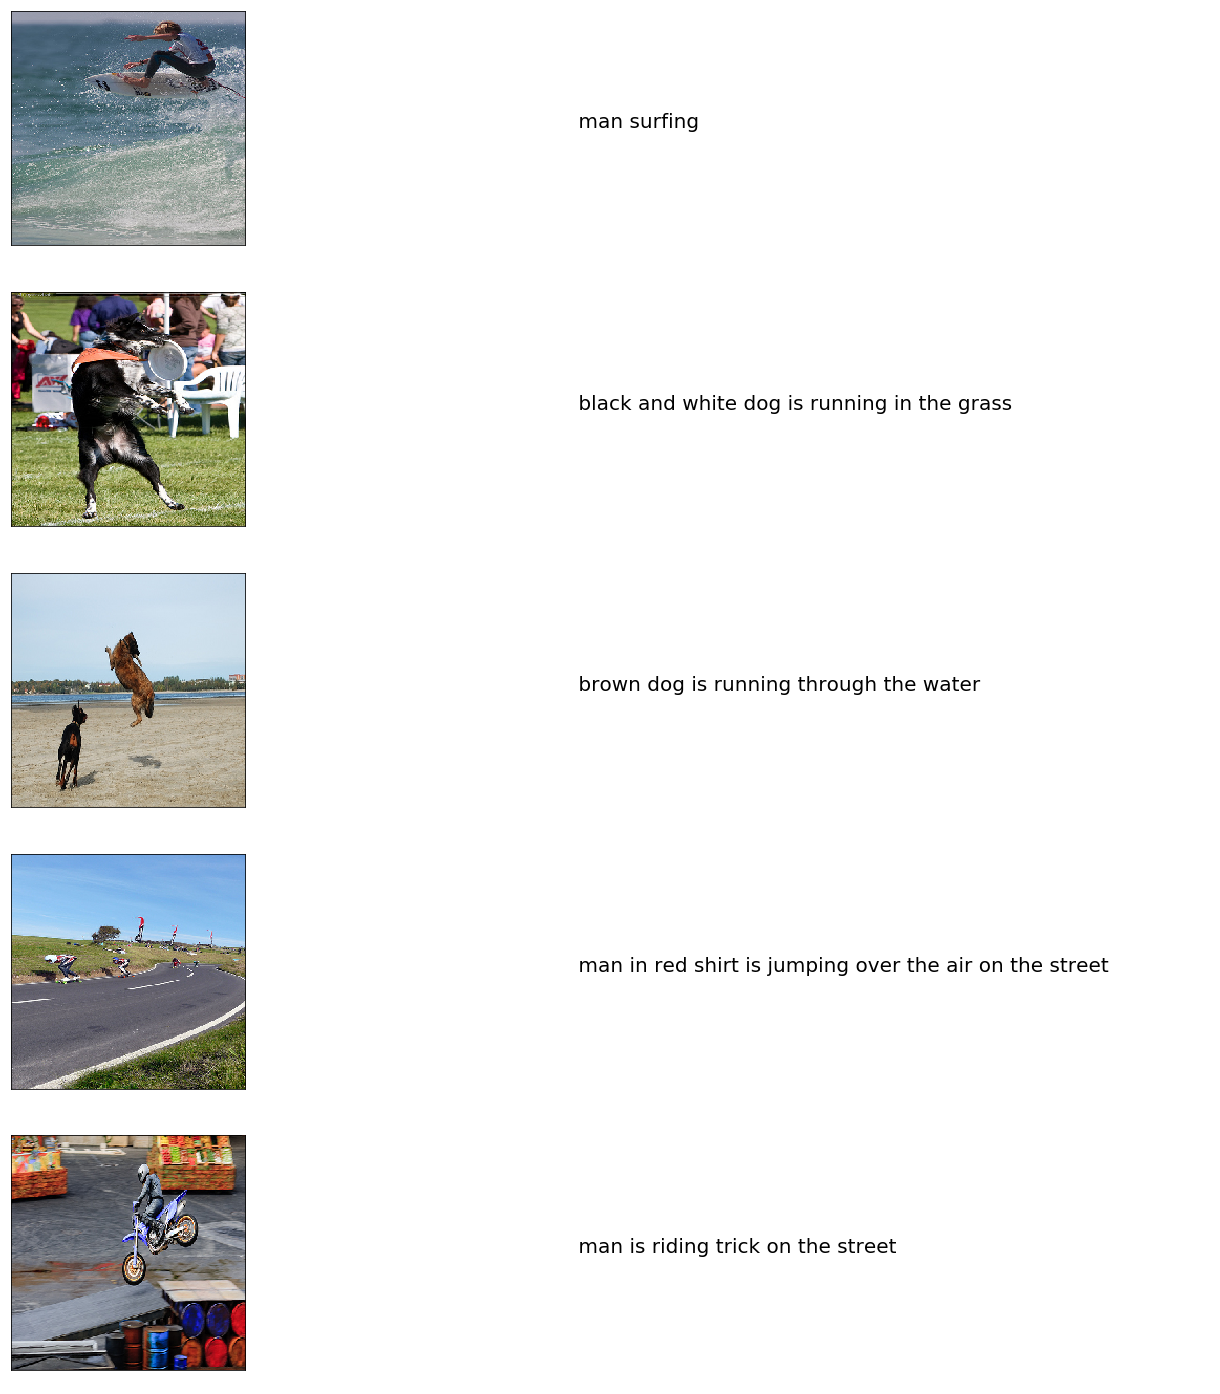

In [36]:
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])
def predict_caption(image):
    '''
    image.shape = (1,4462)
    '''

    in_text = 'startseq'

    for iword in range(maxlen):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence],maxlen)
        yhat = mm.predict([image,sequence],verbose=0)
        yhat = np.argmax(yhat)
        newword = index_word[yhat]
        in_text += " " + newword
        if newword == "endseq":
            break
    return(in_text)



npic = 5
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(25,25))
for jpgfnm, image_feature in zip(fnm_train[52:57],di_train[52:57]):
    ## images
    
    filename = dir_Flickr_jpg + '/' + jpgfnm
    image_load = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1
    
    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption[8:-6],fontsize=20)
    count += 1

plt.show()


In [37]:
# # ####single image caption 1 which is in dataset

# image_feature=images['989754491_7e53fb4586.jpg']
# caption = predict_caption(image_feature.reshape(1,len(image_feature)))
# print(image_feature)
# print(caption)

In [38]:
# ####single image caption  2
# ##Real time
# filename = r'D:\majordataset\Flicker8k_Dataset\test40.jpeg'
# image = load_img(filename, target_size=target_size)
# # convert the image pixels to a numpy array
# image = img_to_array(image)
# nimage = preprocess_input(image)
# y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
# #y_pred = modelinception.predict(nimage.reshape( (1,) + nimage.shape[:3]))
# image_feature = y_pred.flatten()
# print(image_feature)
# caption = predict_caption(image_feature.reshape(1,len(image_feature)))
# print(caption)

In [36]:
from keras.preprocessing.image import load_img, img_to_array
filename = r'D:\majordataset\Flicker8k_Dataset\test40.jpeg'
image = load_img(filename, target_size=target_size)
 # convert the image pixels to a numpy array
image = img_to_array(image)
nimage = preprocess_input(image)
y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
# y_pred = modelinception.predict(nimage.reshape( (1,) + nimage.shape[:3]))
image_feature = y_pred.flatten()
#print(image_feature)


with open("testvector21.txt", "wb") as myFile:
    pickle.dump(image_feature, myFile)
    print("Saved dictionary ")
caption = predict_caption(image_feature.reshape(1,len(image_feature)))
print(caption)
 

[0. 0. 0. ... 0. 0. 0.]
Saved dictionary 
startseq girl in red shirt is walking on the street endseq


In [42]:
# with open("testvector19.txt", "rb") as myFile:
#     image_feature = pickle.load(myFile)
    
# print(image_feature)
# caption = predict_caption(image_feature.reshape(1,len(image_feature)))
# print(caption)

In [43]:
# image_feature.sum()

# with open("testvector16.txt", "wb") as myFile:
#     pickle.dump(image_feature, myFile)
#     print("Saved dictionary ")

In [42]:
#acc1

import nltk
from thesaurus import Word

def similar(word1,word2):
    try:
        w1=Word(word1)
        a=w1.synonyms()
    except:
        a=[]
        a.insert(1,word1)
    
    try:
        w2=Word(word2)
        b=w2.synonyms()
    except:
        b=[]
        b.insert(1,word2)
    #print("Synonyms of-->",word1,"<--are")
    #print (set(a))
    #print(len(a))
    #print()
    #print("Synonyms of-->",word2,"<--are")
    #print(set(b))
    #print(len(b))
    #print()
    #print("The difference between two sets is:-")
    #print(set(a)-set(b))
    #print(len(set(a)-set(b)))
    if(len(set(a)-set(b))<len(a)):
        sim=1
    elif(word2 in set(a)):
        sim=1
    elif(word1 in set(b)):
        sim=1
    else:
        sim=0
    return sim

In [43]:
## acc2

##
def func(sentences1,sentences2):
    #sentences1 = nltk.sent_tokenize(sentences1)#correct sentence
    #sentences2 = nltk.sent_tokenize(sentences2)#predicted sentence
    
    nouns1 = [] 
    nouns2 = []
    adjectives1=[]
    adjectives2=[]
    verbs1=[]
    verbs2=[]
    for sentence in sentences1:
         for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
                     nouns1.append(word)
                if (pos =='JJ'or pos =='JJB' or pos=='JJR' or pos=='JJS'):
                     adjectives1.append(word)
                if (pos =='VB'  or pos=='VBD' or pos=='VBG' or pos=='VBN' or pos=='VBP' or pos=='VBZ'):
                     verbs1.append(word)
    for sentence in sentences2:
         for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
                     nouns2.append(word)
                if (pos =='JJ'or pos =='JJB' or pos=='JJR' or pos=='JJS'):
                     adjectives2.append(word)
                if (pos =='VB' or pos=='VBD' or pos=='VBG' or pos=='VBN' or pos=='VBP' or pos=='VBZ'):
                     verbs2.append(word)
    
    n1=len(list(nouns1))
    n2=len(list(nouns2))
    a1=len(list(adjectives1))
    a2=len(list(adjectives2))
    v1=len(list(verbs1))
    v2=len(list(verbs2))

##    
    resultsimilaritynoun=0
    resultsimilarityadjective=0
    resultsimilarityverb=0
    result=0
    for i in range (len(nouns1)):
        for j in range (len(nouns2)):
            similarity=similar(nouns1[i],nouns2[j])
            if(similarity==1):
                resultsimilaritynoun=resultsimilaritynoun+similarity
                break
    if(n1==0 or n2==0):
        resultsimilaritynoun=0.5
    else:
        resultsimilaritynoun=(resultsimilaritynoun*.5)/n1
    for i in range (len(adjectives1)):
        for j in range (len(adjectives2)):
            similarity=similar(adjectives1[i],adjectives2[j])
            if(similarity==1):
                resultsimilarityadjective=resultsimilarityadjective+similarity
                break
    if(a1==0 or a2==0):
        resultsimilarityadjective=0.2
    else:
        resultsimilarityadjective=(resultsimilarityadjective*.2)/a1
    for i in range (len(verbs1)):
        for j in range (len(verbs2)):
            similarity=similar(verbs1[i],verbs2[j])
            if(similarity==1):
                resultsimilarityverb=resultsimilarityverb+similarity
                break
    if(v1==0 or v2==0):
        resultsimilarityverb=0.3
    else:
        resultsimilarityverb=(resultsimilarityverb*0.3)/v1
    
    result=resultsimilaritynoun+resultsimilarityadjective+resultsimilarityverb
    return result
    

In [ ]:
from nltk import load_parser
import nltk

def sen_check(s):
    grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP 
    NP -> Det N | Det N PP | N | N PP | Det JJ N | JJ N
    VP -> V NP | VP PP | V VP | V
    Det -> 'D' 
    N -> 'N'
    V -> 'V'
    P -> 'P' | 'I'
    JJ -> 'J'
    """)
    pos_list=[]
    list_new=[]
    for word, pos in nltk.pos_tag(nltk.word_tokenize(s)):
        pos_list.append(pos)
    #print(pos_list)

    for w in pos_list:
        list_new.append(w[0])
    parser = nltk.ChartParser(grammar)
    for tree in parser.parse(list_new):
    #    print(tree)
        if tree:
            print("Correct")
        else:
            print("Wrong")
        break

In [45]:
from nltk.translate.bleu_score import sentence_bleu

from nltk.util import ngrams
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])


nkeep = 5
pred_good, pred_bad, bleus = [], [], [] 
sscheck=[]
count = 0 
count1=0
count2=0
count3=0
count4=0
for jpgfnm, image_feature, tokenized_text in zip(fnm_train[60:70],di_train[60:70],dt_train[60:70]):
    count += 1
    if count==10:
        break
    if count % 10 == 0:
        print("Doing the process")
        #print("  {:4.2f}% is done..".format(100*count/float(len(fnm_test))))
    
    caption_true = [ index_word[i] for i in tokenized_text ]     
    caption_true = caption_true[1:-1] ## remove startreg, and endreg
    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    caption = caption.split()
    caption = caption[1:-1]## remove startreg, and endreg
#     print (caption_true)
#     print(caption)
    bleu = func(caption_true,caption)
    if(bleu==1):
        count1=count1+1
    elif(bleu>=0.5 and bleu<1):
        count2=count2+1
    elif(bleu<0.5):
        count3=count+1
    elif(bleu<0.3):
        count4=count+1
    #scheck= sen_check(caption)
    #sscheck.append(scheck)
    bleus.append(bleu)
    if bleu >= 0.5 and len(pred_good) < nkeep:
        pred_good.append((bleu,jpgfnm,caption_true,caption))
    elif bleu < 0.5 and bleu > 0.0 and len(pred_bad) < nkeep:
        pred_bad.append((bleu,jpgfnm,caption_true,caption))
    
        

In [46]:
print(count1)
print(count2)
print(count3)
print(count4)


0
7
5
0


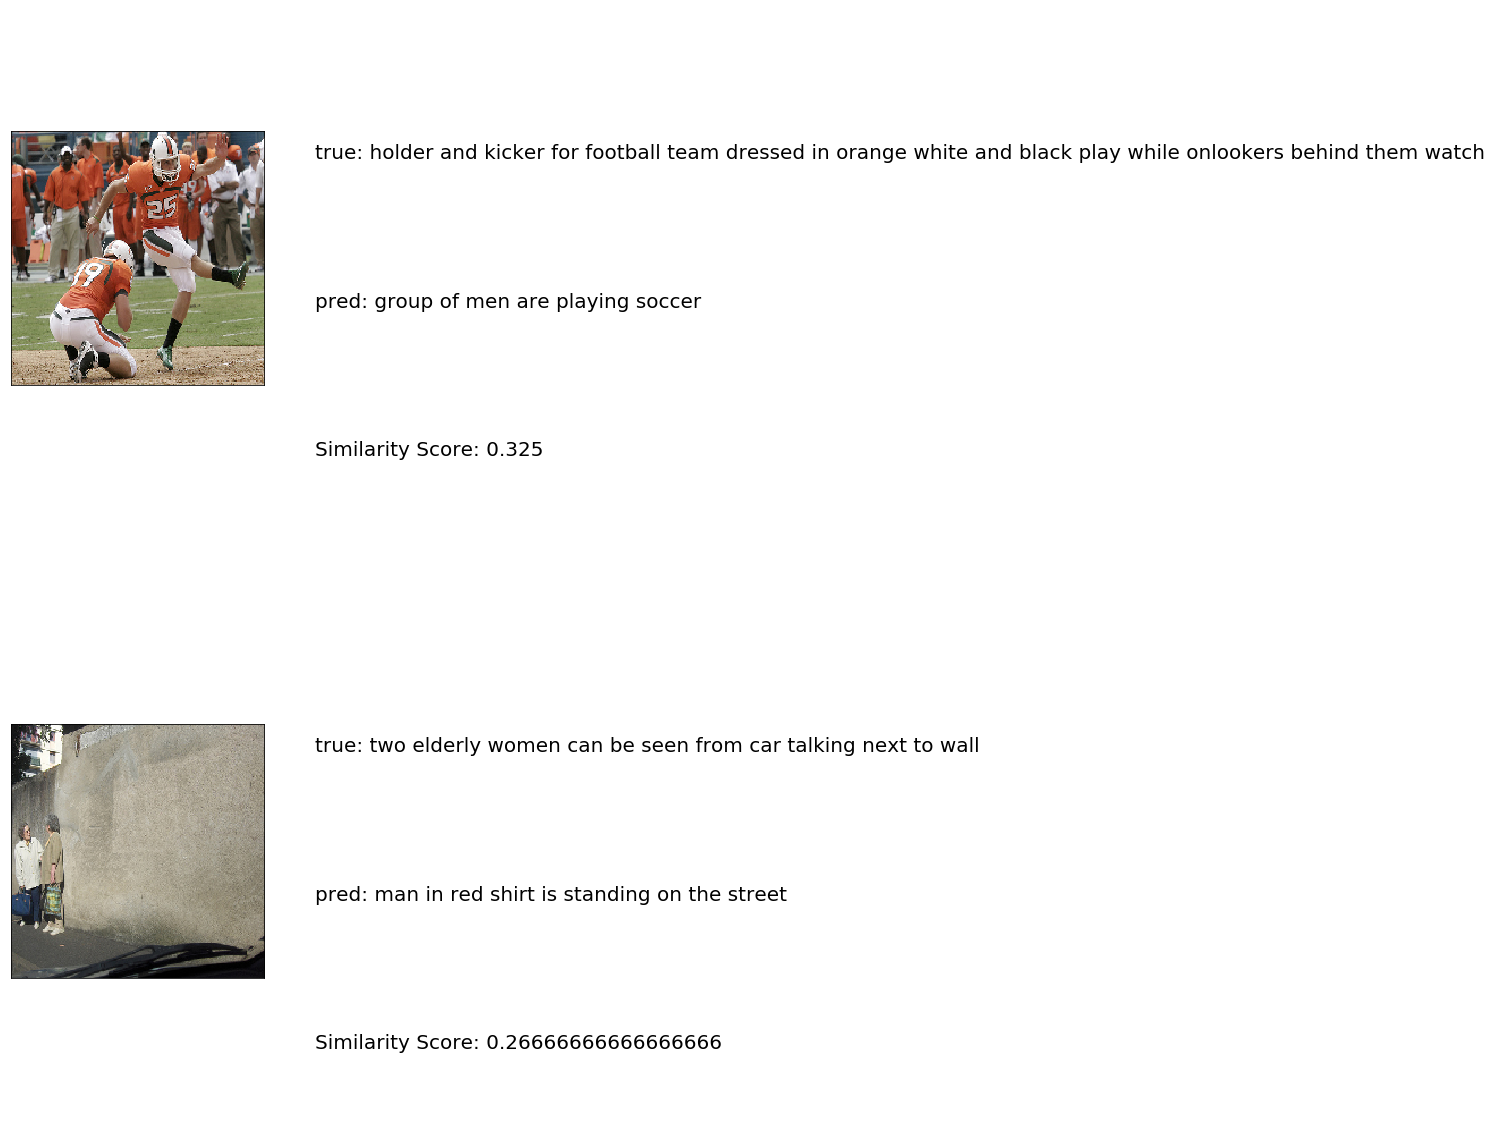

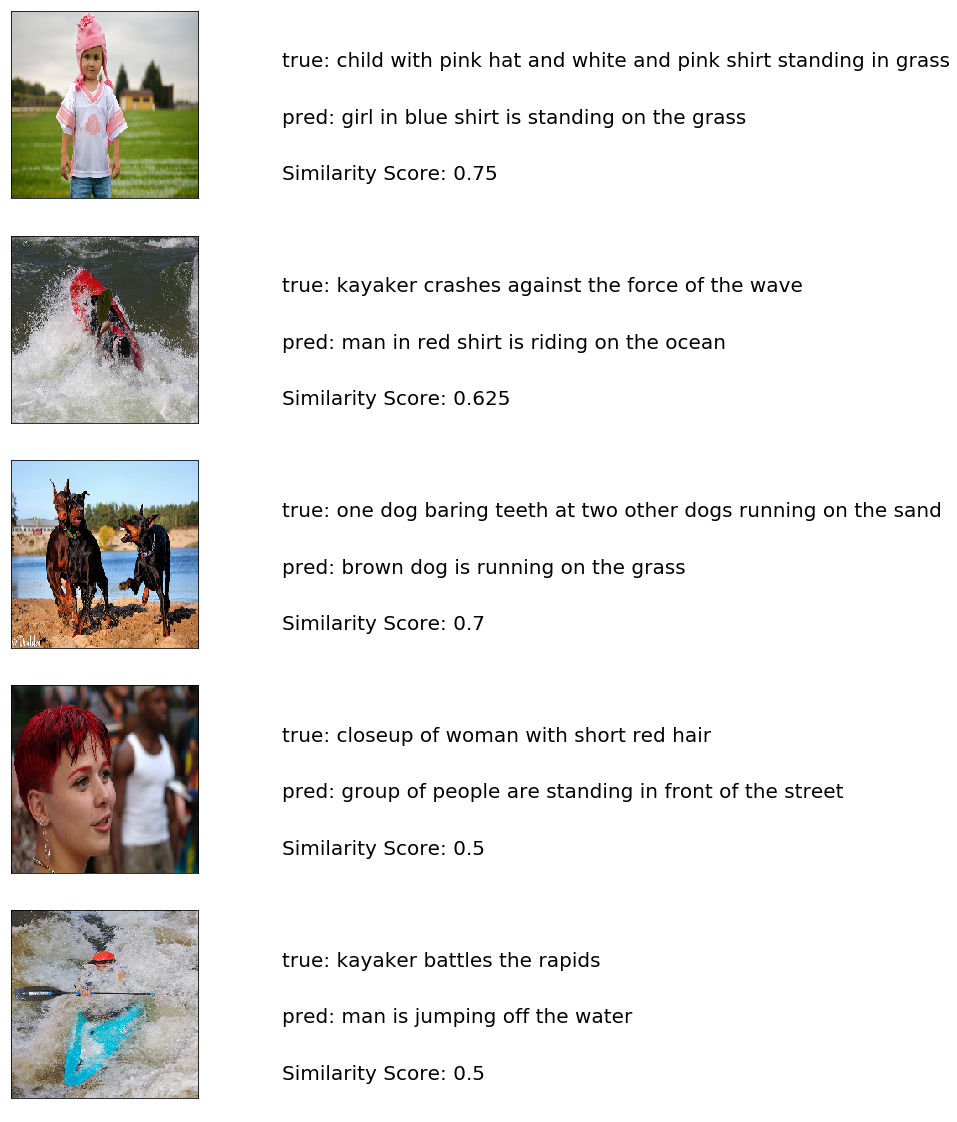

In [47]:
def plot_images(pred_bad):
    def create_str(caption_true):
        strue = ""
        for s in caption_true:
            strue += " " + s
        return(strue)
    npix = 224
    target_size = (npix,npix,3)    
    count = 1
    fig = plt.figure(figsize=(10,20))
    npic = len(pred_bad)
    for pb in pred_bad:
        bleu,jpgfnm,caption_true,caption = pb
        ## images 
        filename = dir_Flickr_jpg + '/' + jpgfnm
        image_load = load_img(filename, target_size=target_size)
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        caption_true = create_str(caption_true)
        caption = create_str(caption)
        
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0,0.7,"true:" + caption_true,fontsize=20)
        ax.text(0,0.4,"pred:" + caption,fontsize=20)
        ax.text(0,0.1,"Similarity Score: {}".format(bleu),fontsize=20)
        count += 1
    plt.show()

#print("Bad Caption")
plot_images(pred_bad)
#print("Good Caption")
plot_images(pred_good)

In [4]:
b=np.mean(bl)
b

0.6975

In [55]:
s=np.mean(sscheck)
s

0.916

run 0
 child in pink dress is climbing up set of stairs in an entry way
1.0 -- 0
run 5
 black dog and spotted dog are fighting
1.0 -- 1.0
run 10
 little girl covered in paint sits in front of painted rainbow with her hands in bowl
0.9285714285714286 -- 1.0


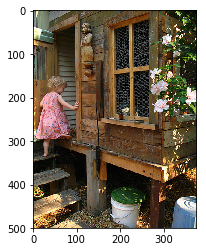

In [36]:
#search image based on caption...............
sim=0
newsim=0
imgp=0
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,15,5):
    print('run',i)
    print(df_txt['caption'][i])
    newsim=func('A little girl in pink dress',df_txt['caption'][i])
    print(newsim, "--", sim)
    if newsim>sim:
        imgp=df_txt['filename'][i]
        sim=newsim
    
filename = dir_Flickr_jpg + '/' + imgp
img=mpimg.imread(filename)
imgplot=plt.imshow(img)
plt.show()

INPUT IMAGE


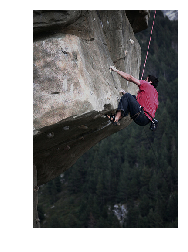

SIMILAR IMAGES


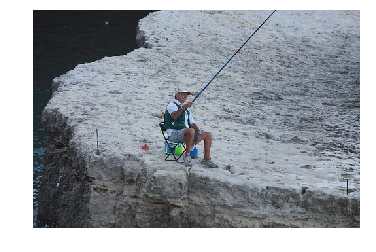

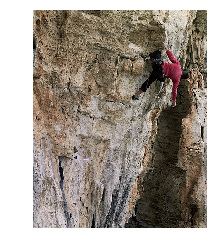

In [57]:
#similar image....
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fname= '997722733_0cb5439472.jpg'
print('INPUT IMAGE')
filename = dir_Flickr_jpg + '/' + fname
img=mpimg.imread(filename)
imgplot=plt.imshow(img)
plt.axis('off')
plt.show()

#i1=images['997722733_0cb5439472.jpg']
#'1007320043_627395c3d8.jpg'
i2=images[fname]
X=[]
Y=[]
max=0
temp=0
img=''
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

#print(cos_sim(i1,i2))
for k,v in images.items():
    temp=cos_sim(i2,v)
    X.append(k)
    Y.append(temp)
    
X.sort(key=dict(zip(X, Y)).get)


    
print('SIMILAR IMAGES')
for i in range(2,4):
    filename = dir_Flickr_jpg + '/' + X[len(X)-i]
    img=mpimg.imread(filename)
    imgplot=plt.imshow(img)
    plt.axis('off')
    plt.show()
